In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

dataset_path = '/kaggle/input/onlineretail/OnlineRetail.csv'
data = pd.read_csv(dataset_path, encoding='unicode_escape')

# Display the first few rows of the dataset
print(data.head())

# Check the shape of the dataset
print("Dataset shape:", data.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
Dataset shape: (541909, 8)


In [2]:
# Check the column data types and missing values
print(data.info())

# Handling missing values
data.dropna(inplace=True) 

# Removing duplicate records
data.drop_duplicates(inplace=True)

# Standardizing formats
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Check the unique values in each column
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"Unique values in {column}: {unique_values}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
Unique values in InvoiceNo: 22190
Unique values in StockCode: 3684
Unique values in Description: 3896
Unique values in Quantity: 436
Unique values in InvoiceDate: 20460
Unique values in UnitPrice: 620
Unique values in CustomerID: 4372
Unique values in Country: 37


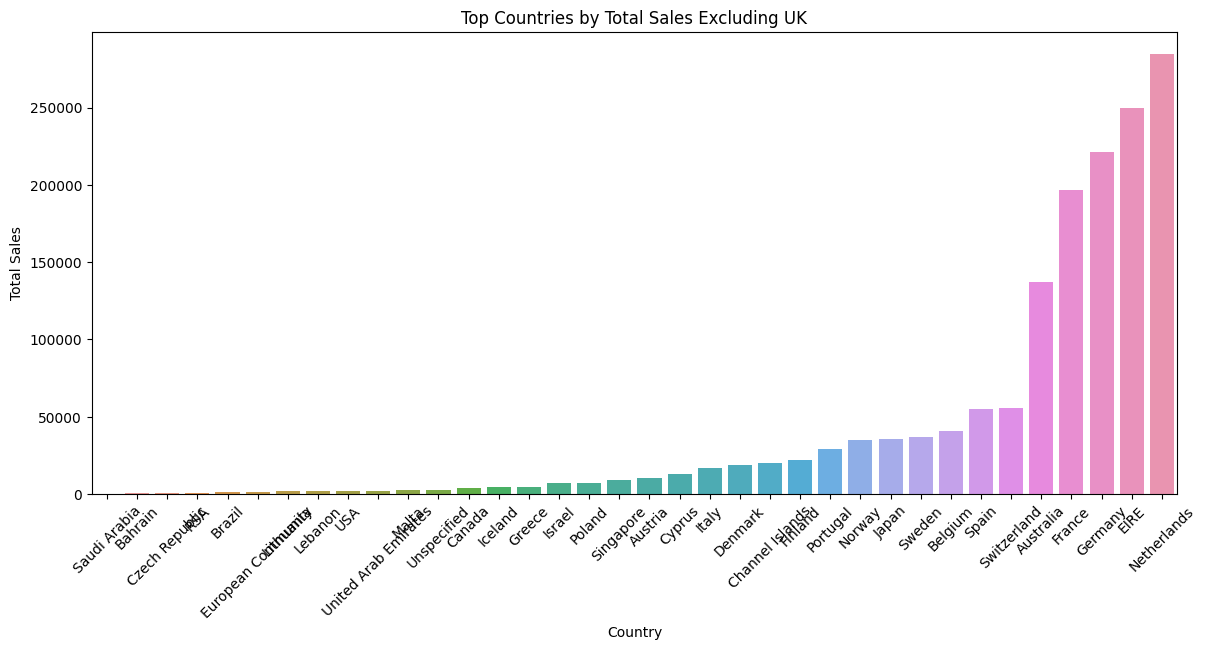

In [3]:
# Calculate the total sales
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Visualize the top countries by total sales without UK
top_countries = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=True).head(-1)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top Countries by Total Sales Excluding UK')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


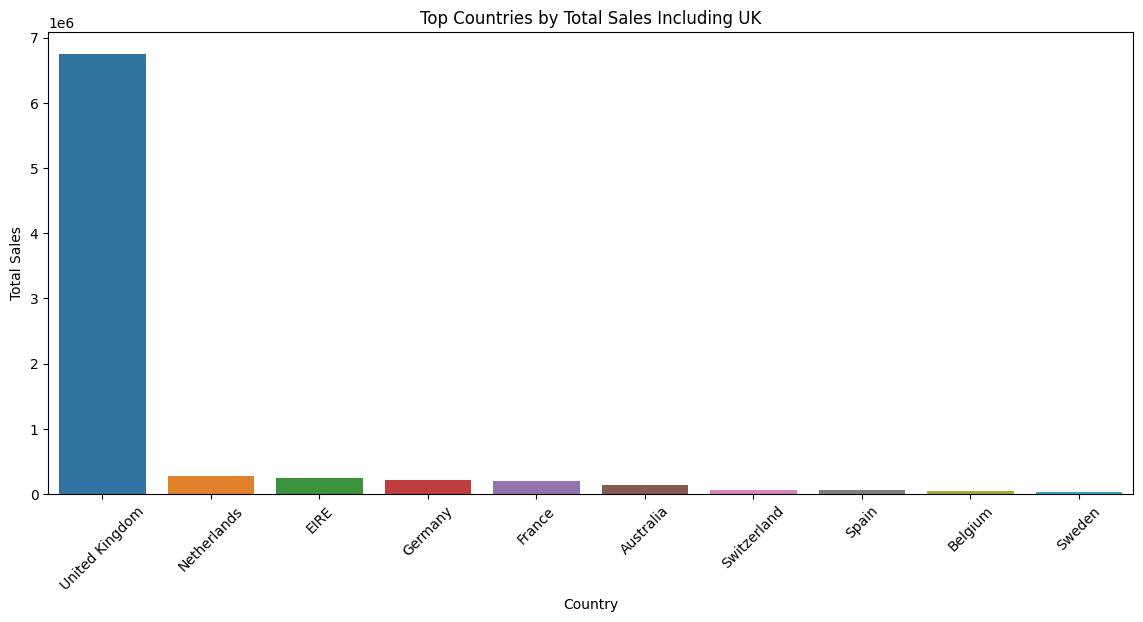

In [4]:
# Visualize the top countries by total sales with UK
top_countries = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top Countries by Total Sales Including UK')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

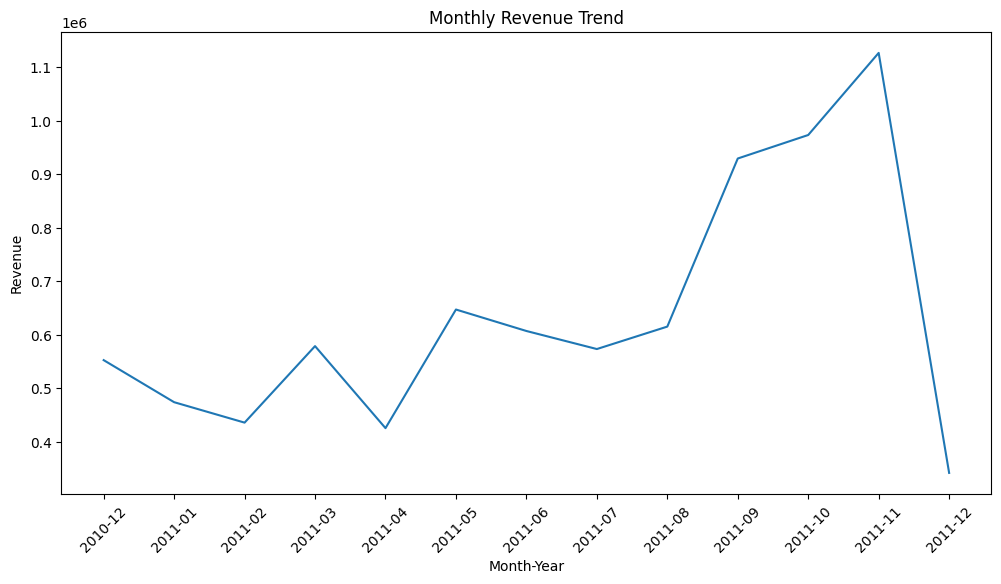

In [5]:
# Extract month and year from 'InvoiceDate' column
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

# Calculate the monthly revenue
monthly_revenue = data.groupby('MonthYear')['TotalSales'].sum()

# Visualize the monthly revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

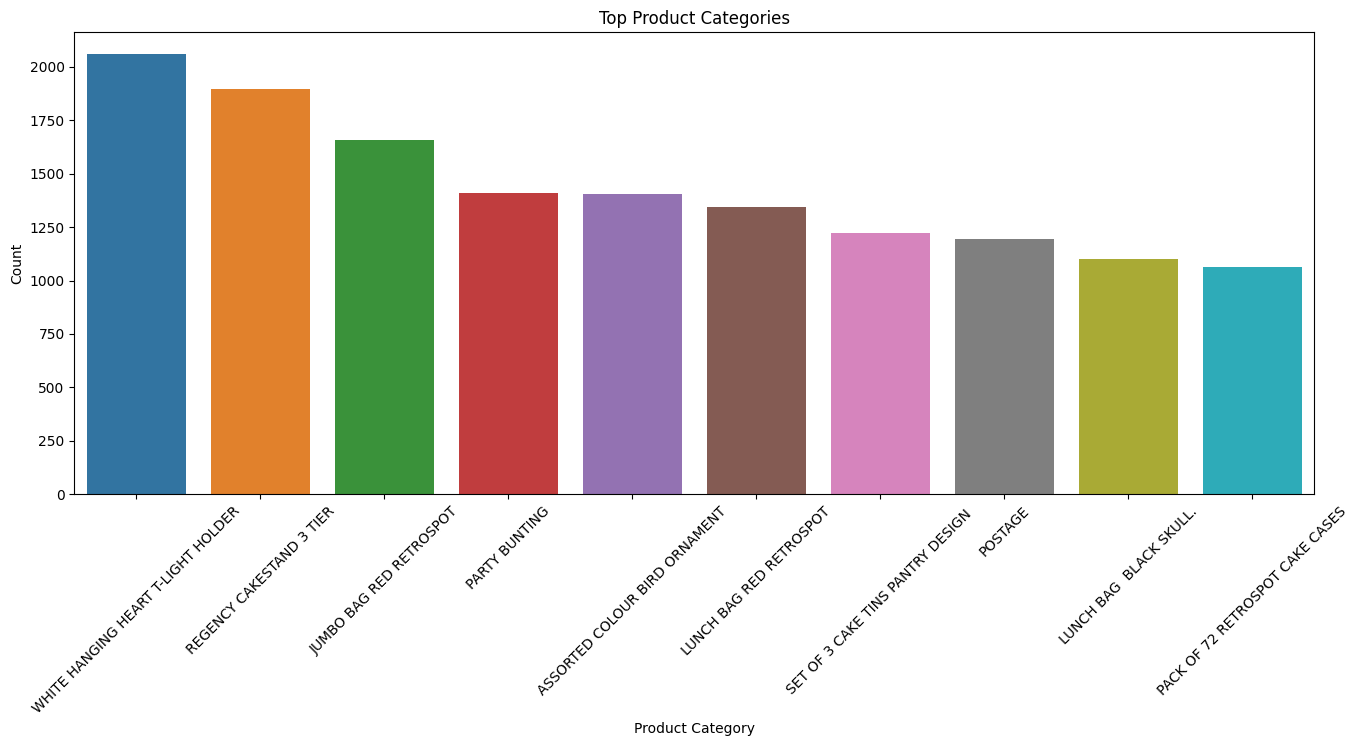

In [6]:
# Visualize the product categories
top_categories = data['Description'].value_counts().head(10)
plt.figure(figsize=(16, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: ylabel='Description'>

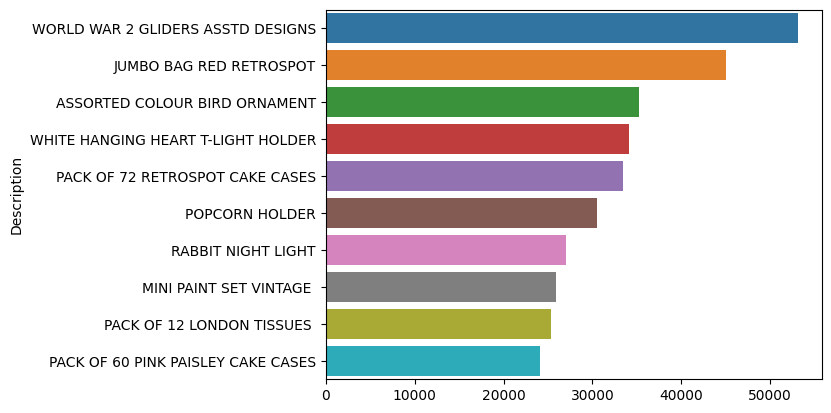

In [7]:
# Visualize the top selling products
top_products = data.groupby('Description')['Quantity'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index)

Average order value is:  373.0743318611988


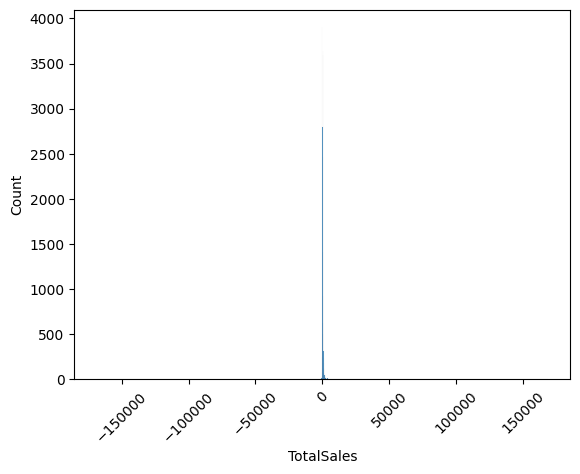

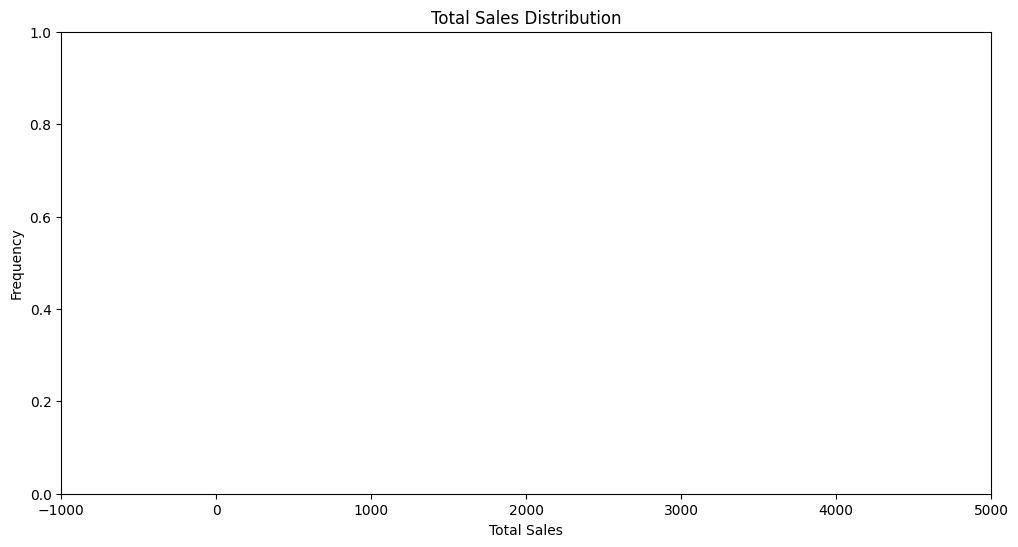

In [8]:
# Visualize distribution of order values
avg_order_value = data.groupby('InvoiceNo')['TotalSales'].sum().mean()
print("Average order value is: ", avg_order_value)

sns.histplot(data.groupby('InvoiceNo')['TotalSales'].sum(), binwidth=100)
plt.xticks(rotation=45)  
plt.figure(figsize=(12, 6))
plt.title('Total Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.xlim(-1000, 5000)
plt.show()

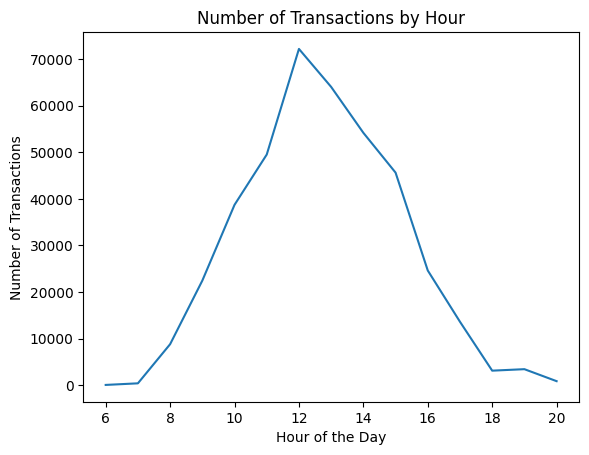

In [9]:
# Visualize transaction count per depending on the hour of day
data['Hour'] = data['InvoiceDate'].dt.hour
transactions_by_hour = data.groupby('Hour')['InvoiceNo'].count()
plt.plot(transactions_by_hour.index, transactions_by_hour.values)

plt.title('Number of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()